In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
#task 1
arr=np.random.random((10, 3))
for i in range(10):
    print(min(arr[i], key = lambda x: abs(x-0.5)))

0.17236375373211354
0.5302572931841554
0.5331210957322403
0.5224110366144407
0.6057136542070176
0.5714309814344287
0.6061969711467068
0.2081796644749606
0.6146245547688174
0.3642312690289362


In [101]:
#task 2
arr=np.random.random((6, 6))
for i in range(6):
    print(np.sum(arr[i])/min(arr[:,i]))

27.351435742173397
12.195999017723697
190.81820381866063
36.135369893283475
7.129829300440954
7.481581508258464


In [120]:
#task 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
m=0
for i in range(len(x)-1):
    if (x[i]==0):
        m=max(x[i+1],m)
print(m)

5


In [125]:
#task 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in i:
    x[j]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [235]:
#task 5
n=3
a = np.arange((n+1)**2).reshape(n+1, n+1)
d={}
print(a)
for i in range(2*n+1):
    if i<n+1:
        d.update({i: a.ravel()[i:i+n*i+1:n]})
    else:
        j=2*n-i
        d.update({i: a.ravel()[-j-1-j*n:-j:n]})
    if i == 2*n:
        d.update({i: a.ravel()[-1::]})
print (d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: array([0]), 1: array([1, 4]), 2: array([2, 5, 8]), 3: array([ 3,  6,  9, 12]), 4: array([ 7, 10, 13]), 5: array([11, 14]), 6: array([15])}


In [528]:
#task6
def get_labels(pts, centroids):
    dist1 = np.linalg.norm(pts-centroids[0], axis=1)
    dist2 = np.linalg.norm(pts-centroids[1], axis=1)
    dist = np.vstack((dist1, dist2))
    
    return np.argmin(dist, axis=0)

def mykmeans(data, k, iter=20, thresh=1e-5):
    if int(iter)<1:
        raise ValueError('iter must be at least 1.')
    centroids = np.random.uniform(-2, 2, 2*k).reshape((k, 2))
    i=0
    thr=4
    
    while ((i<iter) and (thr>thresh)):
        labels = get_labels(data,centroids)
        mask0= labels == 0
        mask1= labels == 1
        if((len(data[mask0])==0) or (len(data[mask1])==0)):
            centroids = np.random.uniform(-2, 2, 2*k).reshape((k, 2))
            i=0
            thr=4
        c0=centroids[0].copy()
        c1=centroids[1].copy()
        centroids[0] = np.mean(data[mask0], axis=0)
        centroids[1] = np.mean(data[mask1], axis=0)
        
        i+=1
        thr=max(np.linalg.norm(c0-centroids[0], axis=0),np.linalg.norm(c1-centroids[1], axis=0))
            
    return centroids

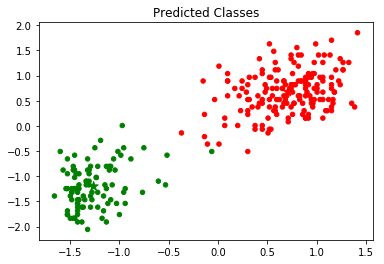

In [537]:
#2-means clasterisation for old faithful geyser eruptions dataset
data = np.loadtxt('faithful.dat', skiprows=26)[:, 1:]
data[:,0]-=np.mean(data[:,0])
data[:,0]/=np.std(data[:,0])
data[:,1]-=np.mean(data[:,1])
data[:,1]/=np.std(data[:,1])

centroids = mykmeans(data,2)
labels = get_labels(data, centroids)

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()